### Groupe 3 | Groupe tp 15:
- Adda Redouane 
- Rahiche Messaoud 
- Krizou Amani 
- Mendil Yousra

## Importation des librairies

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## La lecture de dataset

### Les donnees:

In [2]:
data = np.genfromtxt('data.csv',delimiter=',',dtype=int)
#to show the number of elements in cols and rows
data.shape

(5000, 400)

### Les etiquettes:

In [3]:
labels = np.genfromtxt('labels.csv',delimiter=',',dtype=int)
labels.shape

(5000,)

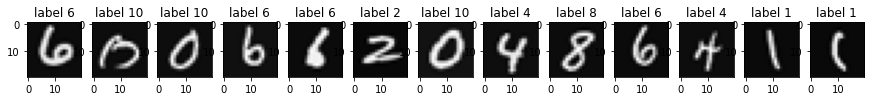

In [4]:
plt.figure(figsize=(15,8))
for i in range(13):
    ran = random.randint(data.shape[0])
    a = data[ran,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(labels[ran]))
    plt.imshow(a,cmap='gray')

## Implémentation des métriques demandées

- Matrice de confusion

In [5]:
def calcule_matrice_confusion(numb):
    TP =FN =FP =TN = 0
    for i in range(number):
        if predictions[i][0] == numb and predictions[i][0] == predictions[i][1]:
            TP+=1
        elif predictions[i][1] == numb and predictions[i][0] != numb :
            FP += 1
        elif predictions[i][0] == numb and predictions[i][1] != numb :
            FN += 1
        elif predictions[i][0] != numb and predictions[i][1] != numb :
            TN += 1
    print("\tPOSITIVE\tNEGATIVE") 
    print('--------------------------------')
    print(f"POSITIVE {TP}\t\t{FN}")
    print('--------------------------------')
    print(f"NEGATIVE {FP}\t\t{TN}")
    print('--------------------------------')
    return [TP,FN,FP,TN]

- Rappel

In [6]:
def rappel(VP,FN):
    return VP/(VP+FN)

- Précision

In [7]:
def precision(VP,FP):
    return VP/(VP+FP)

- Taux de FP

In [8]:
def taux_de_FP(FP,VP):
    return FP/(FP+VP)

- Spécificité

In [9]:
def specificite(VN,FP):
    return VN/(VN+FP)

## Classification

Train set:
Xt: [[ 9  9  9 ...  9  9  9]
 [11 11 11 ... 11 11 11]
 [ 8  8  8 ...  8  8  8]
 ...
 [11 11 11 ... 11 11 11]
 [17 17 17 ... 17 17 17]
 [12 12 12 ... 12 12 12]] 
 ----------------------
Yt: [ 8  6  2 ...  3 10  9] 
 ----------------------

Test set:
Xtt: [[ 9  9  9 ...  9  9  9]
 [ 9  9  9 ...  9  9  9]
 [10 10 10 ... 10 10 10]
 ...
 [13 13 13 ... 13 13 13]
 [ 9  9  9 ...  9  9  9]
 [18 18 18 ... 18 18 18]] 
 ----------------------
Ytt: [ 3  6  9 ... 10  4  2]


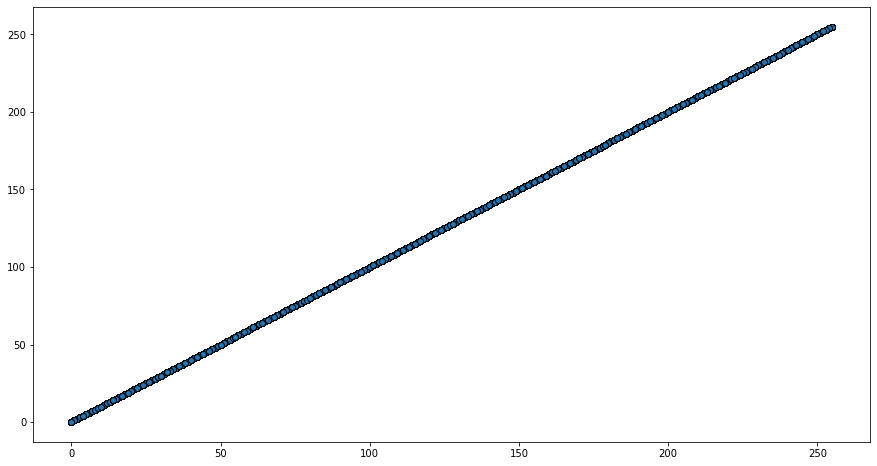

In [10]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#005f73','#0a9396','#94d2bd','#e9d8a6','#ee9b00','#ca6702','#bb3e03','#ae2012','#9b2226'])

# Definition de train set et test set:
tRatio = 2/3
ttRatio =1/3
Xt, Xtt, Yt, Ytt = train_test_split(data, labels,test_size=ttRatio )
print('Train set:')
print(f'Xt: {Xt} \n ----------------------')
print(f'Yt: {Yt} \n ----------------------\n')
print('Test set:')
print(f'Xtt: {Xtt} \n ----------------------')
print(f'Ytt: {Ytt}')

plt.figure(figsize=(15,8))
plt.scatter(data[:,], y=data[:,],cmap=cmap,edgecolor='k')
plt.show()

# Methode 0: K-Plus-Proche Voisin (KNN)

In [11]:
from collections import Counter

def euc_dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)

def KPP(x,Xt,Yt):
    predicted_labels = [predict(x)]
    return np.array(predicted_labels)

def predict(x):
    k=10
    #compute the distances
    distances = np.array([euc_dist(x, xt) for xt in Xt])
    #get the k nearest neighbors and labels:
    kdist = distances.argsort()[0:k]
    knear = [Yt[i] for i in kdist]
#     print(knear)
#     print(knear)
    #Illustrating the k-nearest neighbor:
    plt.figure(figsize=(20,10))
    for i in range(10):
        d= Xt[kdist[i],:].reshape((20, 20))
        d=np.transpose(d)
        plt.subplot(1,10,i+1)
        plt.title('label '+ str(Yt[kdist[i]]))
        plt.imshow(d,cmap='gray')
    #majority vote:
    majority = Counter(knear).most_common(1)
#     print(majority)
    return majority


The value that we wont to predict:


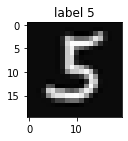

In [12]:
#test:
ran = random.randint(data.shape[0])
valToPredict = data[ran,:]
valToDraw = valToPredict.reshape((20, 20))
print("The value that we wont to predict:")
plt.figure(figsize=(20,10))
valToDraw=np.transpose(valToDraw)
plt.subplot(1,10,1)
plt.title('label '+ str(labels[ran]))
plt.imshow(valToDraw,cmap='gray')
plt.show()

The predicted values:


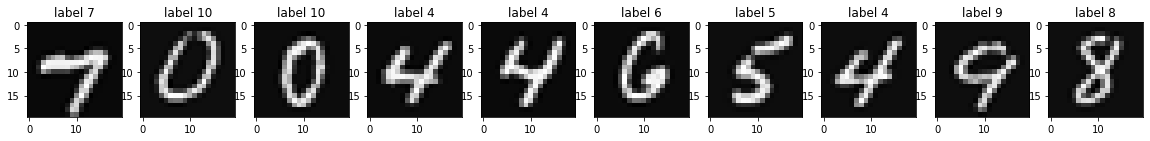

In [13]:
print("The predicted values:")
predictedVal = KPP(valToPredict,Xt,Yt)

In [14]:
print("The majority vote predicted:")
print(f'{predictedVal[0][0][0]} with {predictedVal[0][0][1]} votes')

The majority vote predicted:
4 with 3 votes


### Training Predictions using train set

# KNN variation:
to test all the train set not only one random value:

In [15]:
def KNN_testset(test_set,k):
    prediction =[]
    for i in range(len(Xt)):
        distances = np.array([euc_dist(Xt[i],xt) for xt in Xt])
        k_dist = distances.argsort()[:k]
        k_near = [Yt[i] for i in k_dist]
        majority = Counter(k_near).most_common(1)
        prediction.append((Yt[i],majority[0][0]))
    return prediction

In [16]:
predictions = KNN_testset(Xt, 10)
number = len(predictions)

## La calsse 0:

### Matrice de confusion:

In [17]:
class_0 = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 179		131
--------------------------------
NEGATIVE 225		2798
--------------------------------


### Rappel:

In [18]:
print(f"Le rappel: {rappel(class_0[0],class_0[1])}")

Le rappel: 0.5774193548387097


### Précision

In [19]:
print(f"La precision: {precision(class_0[0],class_0[2])}")

La precision: 0.4430693069306931


### Taux de FP

In [20]:
print(f"Le taux de faux positif: {taux_de_FP(class_0[2],class_0[1])}")

Le taux de faux positif: 0.6320224719101124


### Spécificité

In [21]:
print(f" La spécificité : {specificite(class_0[3],class_0[2])}")

 La spécificité : 0.9255706252067483


In [22]:
# courbe_ROC(class_0[0],class_0[2])

## La calsse 1:

### Matrice de confusion:

In [23]:
class_1 = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 263		71
--------------------------------
NEGATIVE 101		2898
--------------------------------


### Rappel:

In [24]:
print(f"Le rappel: {rappel(class_1[0],class_1[1])}")

Le rappel: 0.7874251497005988


### Précision

In [25]:
print(f"La precision: {precision(class_1[0],class_1[2])}")

La precision: 0.7225274725274725


### Taux de FP

In [26]:
print(f"Le taux de faux positif: {taux_de_FP(class_1[2],class_1[1])}")

Le taux de faux positif: 0.5872093023255814


### Spécificité

In [27]:
print(f" La spécificité : {specificite(class_1[3],class_1[2])}")

 La spécificité : 0.966322107369123


## La calsse 2:

### Matrice de confusion:

In [28]:
class_2 = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 145		204
--------------------------------
NEGATIVE 193		2791
--------------------------------


### Le rappel:

In [29]:
print(f"Le rappel: {rappel(class_2[0],class_2[1])}")

Le rappel: 0.4154727793696275


### La precision:

In [30]:
print(f"La precision: {precision(class_2[0],class_2[2])}")

La precision: 0.4289940828402367


### Le taux de faux positif:

In [31]:
print(f"Le taux de faux positif: {taux_de_FP(class_2[2],class_2[1])}")

Le taux de faux positif: 0.48614609571788414


### Spécificité

In [32]:
print(f" La spécificité : {specificite(class_2[3],class_2[2])}")

 La spécificité : 0.9353217158176944


## La calsse 3:

### Matrice de confusion:

In [33]:
class_3 = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 137		203
--------------------------------
NEGATIVE 159		2834
--------------------------------


### Le rappel:

In [34]:
print(f"Le rappel: {rappel(class_3[0],class_3[1])}")

Le rappel: 0.40294117647058825


### La precision:

In [35]:
print(f"La precision: {precision(class_3[0],class_3[2])}")

La precision: 0.46283783783783783


### Le taux de faux positif:

In [36]:
print(f"Le taux de faux positif: {taux_de_FP(class_3[2],class_3[1])}")

Le taux de faux positif: 0.43922651933701656


### Spécificité

In [37]:
print(f" La spécificité : {specificite(class_3[3],class_3[2])}")

 La spécificité : 0.9468760441029068


## Classe 4:

### La matrice de confusion:

In [38]:
class_4 = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 154		175
--------------------------------
NEGATIVE 219		2785
--------------------------------


### Le rappel:

In [39]:
print(f"Le rappel: {rappel(class_4[0],class_4[1])}")

Le rappel: 0.46808510638297873


### La precision:

In [40]:
print(f"La precision: {precision(class_4[0],class_4[2])}")

La precision: 0.4128686327077748


### Le taux de faux positif:

In [41]:
print(f"Le taux de faux positif: {taux_de_FP(class_4[2],class_4[1])}")

Le taux de faux positif: 0.5558375634517766


### Spécificité

In [42]:
print(f" La spécificité : {specificite(class_4[3],class_4[2])}")

 La spécificité : 0.9270972037283621


## Classe 5:

### La matrice de confusion:

In [43]:
class_5 = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 122		218
--------------------------------
NEGATIVE 155		2838
--------------------------------


### Le rappel: 

In [44]:
print(f"Le rappel: {rappel(class_5[0],class_5[1])}")

Le rappel: 0.3588235294117647


### La precision:

In [45]:
print(f"La precision: {precision(class_5[0],class_5[2])}")

La precision: 0.4404332129963899


### Le taux de faux positif:

In [46]:
print(f"Le taux de faux positif: {taux_de_FP(class_5[2],class_5[1])}")

Le taux de faux positif: 0.4155495978552279


### Spécificité

In [47]:
print(f" La spécificité : {specificite(class_5[3],class_5[2])}")

 La spécificité : 0.9482124958235884


## Classe 6:

### La matrice de confusion:

In [48]:
class_6 = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 101		223
--------------------------------
NEGATIVE 152		2857
--------------------------------


### Le rappel: 

In [49]:
print(f"Le rappel: {rappel(class_6[0],class_6[1])}")

Le rappel: 0.3117283950617284


### La precision:

In [50]:
print(f"La precision: {precision(class_6[0],class_6[2])}")

La precision: 0.39920948616600793


### Le taux de faux positif:

In [51]:
print(f"Le taux de faux positif: {taux_de_FP(class_6[2],class_6[1])}")

Le taux de faux positif: 0.4053333333333333


### Spécificité

In [52]:
print(f" La spécificité : {specificite(class_6[3],class_6[2])}")

 La spécificité : 0.9494848786972416


## Classe 7:

### Matrice de confusion:

In [53]:
class_7 = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 151		190
--------------------------------
NEGATIVE 213		2779
--------------------------------


### Le rappel: 

In [54]:
print(f"Le rappel: {rappel(class_7[0],class_7[1])}")

Le rappel: 0.44281524926686217


### La precision:

In [55]:
print(f"La precision: {precision(class_7[0],class_7[2])}")

La precision: 0.41483516483516486


### Le taux de faux positif:

In [56]:
print(f"Le taux de faux positif: {taux_de_FP(class_7[2],class_7[1])}")

Le taux de faux positif: 0.5285359801488834


### Spécificité

In [57]:
print(f" La spécificité : {specificite(class_7[3],class_7[2])}")

 La spécificité : 0.9288101604278075


## Classe 8:

### Matrice de confusion:

In [58]:
class_8 = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 127		206
--------------------------------
NEGATIVE 175		2825
--------------------------------


### Le rappel: 

In [59]:
print(f"Le rappel: {rappel(class_8[0],class_8[1])}")

Le rappel: 0.3813813813813814


### La precision:

In [60]:
print(f"La precision: {precision(class_8[0],class_8[2])}")

La precision: 0.4205298013245033


### Le taux de faux positif:

In [61]:
print(f"Le taux de faux positif: {taux_de_FP(class_8[2],class_8[1])}")

Le taux de faux positif: 0.45931758530183725


### Spécificité

In [62]:
print(f" La spécificité : {specificite(class_8[3],class_8[2])}")

 La spécificité : 0.9416666666666667


## Classe 9:

### Matrice de confusion:

In [63]:
class_9 = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 150		183
--------------------------------
NEGATIVE 212		2788
--------------------------------


### Le rappel: 

In [64]:
print(f"Le rappel: {rappel(class_9[0],class_9[1])}")

Le rappel: 0.45045045045045046


### La precision:

In [65]:
print(f"La precision: {precision(class_9[0],class_9[2])}")

La precision: 0.4143646408839779


### Le taux de faux positif:

In [66]:
print(f"Le taux de faux positif: {taux_de_FP(class_9[2],class_9[1])}")

Le taux de faux positif: 0.5367088607594936


### Spécificité

In [67]:
print(f" La spécificité : {specificite(class_9[3],class_9[2])}")

 La spécificité : 0.9293333333333333


# Méthode 1: MVS

In [68]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#Créer le modèle
model= svm.SVC(kernel='linear',probability=True) 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [69]:
xtt_len = len(Xtt)
xtt_labels =  np.array([Ytt[i] for i in range(xtt_len)])
predictions =[list(a) for a in zip(xtt_labels, y_pred)]

In [70]:
number = len(predictions)

## Courbe ROC:

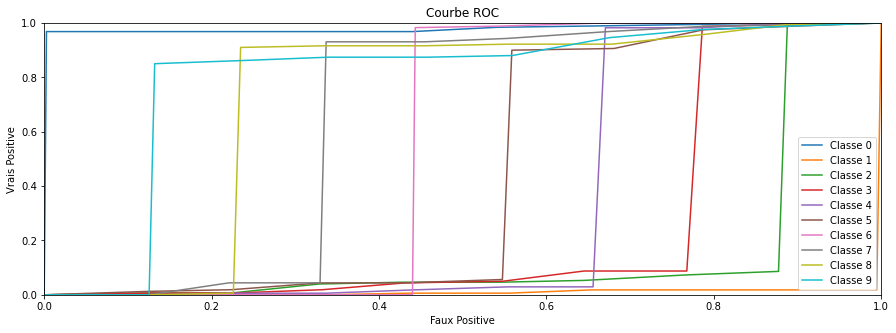

In [71]:
fpr10, tpr10, _ = roc_curve(Ytt, y_pred, pos_label=10)
fpr1, tpr1, _ = roc_curve(Ytt, y_pred, pos_label=1)
fpr2, tpr2, _ = roc_curve(Ytt, y_pred, pos_label=2)
fpr3, tpr3, _ = roc_curve(Ytt, y_pred, pos_label=3)
fpr4, tpr4, _ = roc_curve(Ytt, y_pred, pos_label=4)
fpr5, tpr5, _ = roc_curve(Ytt, y_pred, pos_label=5)
fpr6, tpr6, _ = roc_curve(Ytt, y_pred, pos_label=6)
fpr7, tpr7, _ = roc_curve(Ytt, y_pred, pos_label=7)
fpr8, tpr8, _ = roc_curve(Ytt, y_pred, pos_label=8)
fpr9, tpr9, _ = roc_curve(Ytt, y_pred, pos_label=9)

plt.figure(figsize=(15,5))
plt.plot(fpr10,tpr10,label="Classe 0")
plt.plot(fpr1,tpr1,label="Classe 1")
plt.plot(fpr2,tpr2,label="Classe 2")
plt.plot(fpr3,tpr3,label="Classe 3")
plt.plot(fpr4,tpr4,label="Classe 4")
plt.plot(fpr5,tpr5,label="Classe 5")
plt.plot(fpr6,tpr6,label="Classe 6")
plt.plot(fpr7,tpr7,label="Classe 7")
plt.plot(fpr8,tpr8,label="Classe 8")
plt.plot(fpr9,tpr9,label="Classe 9")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Faux Positive")
plt.ylabel("Vrais Positive")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

## Classe 0:

### Matrice de confusion:

In [72]:
class_0_MVS = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 184		6
--------------------------------
NEGATIVE 4		1473
--------------------------------


### Rappel:

In [73]:
print(f"Le rappel: {rappel(class_0_MVS[0],class_0_MVS[1])}")

Le rappel: 0.968421052631579


### Précision

In [74]:
print(f"La precision: {precision(class_0_MVS[0],class_0_MVS[2])}")

La precision: 0.9787234042553191


### Taux de FP

In [75]:
print(f"Le taux de faux positif: {taux_de_FP(class_0_MVS[2],class_0_MVS[1])}")

Le taux de faux positif: 0.4


### Spécificité

In [76]:
print(f" La spécificité : {specificite(class_0_MVS[3],class_0_MVS[2])}")

 La spécificité : 0.997291807718348


## Classe 1:

### Matrice de confusion:

In [77]:
class_1_MVS = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 163		3
--------------------------------
NEGATIVE 8		1493
--------------------------------


### Rappel:

In [78]:
print(f"Le rappel: {rappel(class_1_MVS[0],class_1_MVS[1])}")

Le rappel: 0.9819277108433735


### Précision

In [79]:
print(f"La precision: {precision(class_1_MVS[0],class_1_MVS[2])}")

La precision: 0.9532163742690059


### Taux de FP

In [80]:
print(f"Le taux de faux positif: {taux_de_FP(class_1_MVS[2],class_1_MVS[1])}")

Le taux de faux positif: 0.7272727272727273


### Spécificité

In [81]:
print(f" La spécificité : {specificite(class_1_MVS[3],class_1_MVS[2])}")

 La spécificité : 0.9946702198534311


## Classe 2:

### Matrice de confusion:

In [82]:
class_2_MVS = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 137		14
--------------------------------
NEGATIVE 16		1500
--------------------------------


### Rappel:

In [83]:
print(f"Le rappel: {rappel(class_2_MVS[0],class_2_MVS[1])}")

Le rappel: 0.9072847682119205


### Précision

In [84]:
print(f"La precision: {precision(class_2_MVS[0],class_2_MVS[2])}")

La precision: 0.8954248366013072


### Taux de FP

In [85]:
print(f"Le taux de faux positif: {taux_de_FP(class_2_MVS[2],class_2_MVS[1])}")

Le taux de faux positif: 0.5333333333333333


### Spécificité

In [86]:
print(f" La spécificité : {specificite(class_2_MVS[3],class_2_MVS[2])}")

 La spécificité : 0.9894459102902374


## Classe 3:

### Matrice de confusion:

In [87]:
class_3_MVS = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 144		16
--------------------------------
NEGATIVE 28		1479
--------------------------------


### Rappel:

In [88]:
print(f"Le rappel: {rappel(class_3_MVS[0],class_3_MVS[1])}")

Le rappel: 0.9


### Précision

In [89]:
print(f"La precision: {precision(class_3_MVS[0],class_3_MVS[2])}")

La precision: 0.8372093023255814


### Taux de FP

In [90]:
print(f"Le taux de faux positif: {taux_de_FP(class_3_MVS[2],class_3_MVS[1])}")

Le taux de faux positif: 0.6363636363636364


### Spécificité

In [91]:
print(f" La spécificité : {specificite(class_3_MVS[3],class_3_MVS[2])}")

 La spécificité : 0.9814200398142005


## Classe 4:

### Matrice de confusion:

In [92]:
class_4_MVS = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 163		8
--------------------------------
NEGATIVE 22		1474
--------------------------------


### Rappel:

In [93]:
print(f"Le rappel: {rappel(class_4_MVS[0],class_4_MVS[1])}")

Le rappel: 0.9532163742690059


### Précision

In [94]:
print(f"La precision: {precision(class_4_MVS[0],class_4_MVS[2])}")

La precision: 0.8810810810810811


### Taux de FP

In [95]:
print(f"Le taux de faux positif: {taux_de_FP(class_4_MVS[2],class_4_MVS[1])}")

Le taux de faux positif: 0.7333333333333333


### Spécificité

In [96]:
print(f" La spécificité : {specificite(class_4_MVS[3],class_4_MVS[2])}")

 La spécificité : 0.9852941176470589


## Classe 5:

### Matrice de confusion:

In [97]:
class_5_MVS = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 135		25
--------------------------------
NEGATIVE 17		1490
--------------------------------


### Rappel:

In [98]:
print(f"Le rappel: {rappel(class_5_MVS[0],class_5_MVS[1])}")

Le rappel: 0.84375


### Précision

In [99]:
print(f"La precision: {precision(class_5_MVS[0],class_5_MVS[2])}")

La precision: 0.8881578947368421


### Taux de FP

In [100]:
print(f"Le taux de faux positif: {taux_de_FP(class_5_MVS[2],class_5_MVS[1])}")

Le taux de faux positif: 0.40476190476190477


### Spécificité

In [101]:
print(f" La spécificité : {specificite(class_5_MVS[3],class_5_MVS[2])}")

 La spécificité : 0.9887193098871931


## Classe 6:

### Matrice de confusion:

In [102]:
class_6_MVS = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 173		3
--------------------------------
NEGATIVE 5		1486
--------------------------------


### Rappel:

In [103]:
print(f"Le rappel: {rappel(class_6_MVS[0],class_6_MVS[1])}")

Le rappel: 0.9829545454545454


### Précision

In [104]:
print(f"La precision: {precision(class_6_MVS[0],class_6_MVS[2])}")

La precision: 0.9719101123595506


### Taux de FP

In [105]:
print(f"Le taux de faux positif: {taux_de_FP(class_6_MVS[2],class_6_MVS[1])}")

Le taux de faux positif: 0.625


### Spécificité

In [106]:
print(f" La spécificité : {specificite(class_6_MVS[3],class_6_MVS[2])}")

 La spécificité : 0.9966465459423206


## Classe 7:

### Matrice de confusion:

In [107]:
class_7_MVS = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 141		18
--------------------------------
NEGATIVE 11		1497
--------------------------------


### Rappel:

In [108]:
print(f"Le rappel: {rappel(class_7_MVS[0],class_7_MVS[1])}")

Le rappel: 0.8867924528301887


### Précision

In [109]:
print(f"La precision: {precision(class_7_MVS[0],class_7_MVS[2])}")

La precision: 0.9276315789473685


### Taux de FP

In [110]:
print(f"Le taux de faux positif: {taux_de_FP(class_7_MVS[2],class_7_MVS[1])}")

Le taux de faux positif: 0.3793103448275862


### Spécificité

In [111]:
print(f" La spécificité : {specificite(class_7_MVS[3],class_7_MVS[2])}")

 La spécificité : 0.9927055702917772


## Classe 8:

### Matrice de confusion:

In [112]:
class_8_MVS = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 151		16
--------------------------------
NEGATIVE 13		1487
--------------------------------


### Rappel:

In [113]:
print(f"Le rappel: {rappel(class_8_MVS[0],class_8_MVS[1])}")

Le rappel: 0.9041916167664671


### Précision

In [114]:
print(f"La precision: {precision(class_8_MVS[0],class_8_MVS[2])}")

La precision: 0.9207317073170732


### Taux de FP

In [115]:
print(f"Le taux de faux positif: {taux_de_FP(class_8_MVS[2],class_8_MVS[1])}")

Le taux de faux positif: 0.4482758620689655


### Spécificité

In [116]:
print(f" La spécificité : {specificite(class_8_MVS[3],class_8_MVS[2])}")

 La spécificité : 0.9913333333333333


## Classe 9:

### Matrice de confusion:

In [117]:
class_9_MVS = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 142		25
--------------------------------
NEGATIVE 10		1490
--------------------------------


### Rappel:

In [118]:
print(f"Le rappel: {rappel(class_9_MVS[0],class_9_MVS[1])}")

Le rappel: 0.8502994011976048


### Précision

In [119]:
print(f"La precision: {precision(class_9_MVS[0],class_9_MVS[2])}")

La precision: 0.9342105263157895


### Taux de FP

In [120]:
print(f"Le taux de faux positif: {taux_de_FP(class_9_MVS[2],class_9_MVS[1])}")

Le taux de faux positif: 0.2857142857142857


### Spécificité

In [121]:
print(f" La spécificité : {specificite(class_9_MVS[3],class_9_MVS[2])}")

 La spécificité : 0.9933333333333333


# Méthode 2: Arbres de décision

In [122]:
from sklearn.tree import DecisionTreeClassifier
# Créer le modèle
model_arbre = DecisionTreeClassifier()
# Entrainer le modèle
model_arbre = model_arbre.fit(Xt, Yt)
# Prediction
y_pred_arbre = model_arbre.predict(Xtt)

In [123]:
xtt_len = len(Xtt)
xtt_labels_labels =  np.array([Ytt[i] for i in range(xtt_len)])
predictions =[list(a) for a in zip(xtt_labels_labels, y_pred_arbre)]

In [124]:
number = len(predictions)

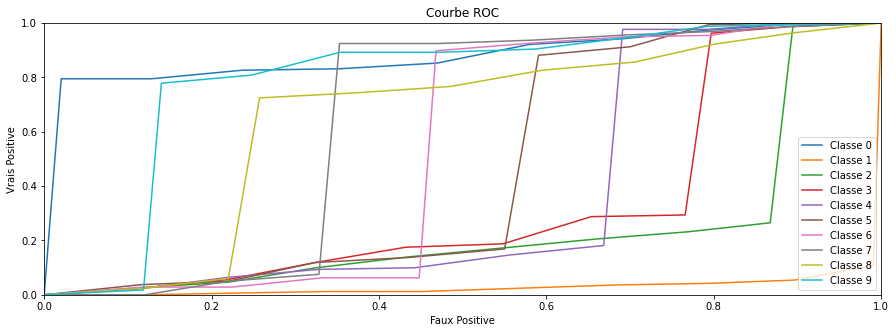

In [125]:
fpr10, tpr10, _ = roc_curve(Ytt, y_pred_arbre, pos_label=10)
fpr1, tpr1, _ = roc_curve(Ytt, y_pred_arbre, pos_label=1)
fpr2, tpr2, _ = roc_curve(Ytt, y_pred_arbre, pos_label=2)
fpr3, tpr3, _ = roc_curve(Ytt, y_pred_arbre, pos_label=3)
fpr4, tpr4, _ = roc_curve(Ytt, y_pred_arbre, pos_label=4)
fpr5, tpr5, _ = roc_curve(Ytt, y_pred_arbre, pos_label=5)
fpr6, tpr6, _ = roc_curve(Ytt, y_pred_arbre, pos_label=6)
fpr7, tpr7, _ = roc_curve(Ytt, y_pred_arbre, pos_label=7)
fpr8, tpr8, _ = roc_curve(Ytt, y_pred_arbre, pos_label=8)
fpr9, tpr9, _ = roc_curve(Ytt, y_pred_arbre, pos_label=9)

plt.figure(figsize=(15,5))
plt.plot(fpr10,tpr10,label="Classe 0")
plt.plot(fpr1,tpr1,label="Classe 1")
plt.plot(fpr2,tpr2,label="Classe 2")
plt.plot(fpr3,tpr3,label="Classe 3")
plt.plot(fpr4,tpr4,label="Classe 4")
plt.plot(fpr5,tpr5,label="Classe 5")
plt.plot(fpr6,tpr6,label="Classe 6")
plt.plot(fpr7,tpr7,label="Classe 7")
plt.plot(fpr8,tpr8,label="Classe 8")
plt.plot(fpr9,tpr9,label="Classe 9")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Faux Positive")
plt.ylabel("Vrais Positive")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

## Classe 0:

### Matrice de confusion:

In [126]:
class_0_arbre = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 151		39
--------------------------------
NEGATIVE 30		1447
--------------------------------


### Rappel:

In [127]:
print(f"Le rappel: {rappel(class_0_arbre[0],class_0_arbre[1])}")

Le rappel: 0.7947368421052632


### Précision

In [128]:
print(f"La precision: {precision(class_0_arbre[0],class_0_arbre[2])}")

La precision: 0.8342541436464088


### Taux de FP

In [129]:
print(f"Le taux de faux positif: {taux_de_FP(class_0_arbre[2],class_0_arbre[1])}")

Le taux de faux positif: 0.43478260869565216


### Spécificité

In [130]:
print(f" La spécificité : {specificite(class_0_arbre[3],class_0_arbre[2])}")

 La spécificité : 0.97968855788761


## Classe 1:

### Matrice de confusion:

In [131]:
class_1_arbre = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 148		18
--------------------------------
NEGATIVE 14		1487
--------------------------------


### Rappel:

In [132]:
print(f"Le rappel: {rappel(class_1_arbre[0],class_1_arbre[1])}")

Le rappel: 0.891566265060241


### Précision

In [133]:
print(f"La precision: {precision(class_1_arbre[0],class_1_arbre[2])}")

La precision: 0.9135802469135802


### Taux de FP

In [134]:
print(f"Le taux de faux positif: {taux_de_FP(class_1_arbre[2],class_1_arbre[1])}")

Le taux de faux positif: 0.4375


### Spécificité

In [135]:
print(f" La spécificité : {specificite(class_1_arbre[3],class_1_arbre[2])}")

 La spécificité : 0.9906728847435043


## Classe 2:

### Matrice de confusion:

In [136]:
class_2_arbre = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 109		42
--------------------------------
NEGATIVE 41		1475
--------------------------------


### Rappel:

In [137]:
print(f"Le rappel: {rappel(class_2_arbre[0],class_2_arbre[1])}")

Le rappel: 0.7218543046357616


### Précision

In [138]:
print(f"La precision: {precision(class_2_arbre[0],class_2_arbre[2])}")

La precision: 0.7266666666666667


### Taux de FP

In [139]:
print(f"Le taux de faux positif: {taux_de_FP(class_2_arbre[2],class_2_arbre[1])}")

Le taux de faux positif: 0.4939759036144578


### Spécificité

In [140]:
print(f" La spécificité : {specificite(class_2_arbre[3],class_2_arbre[2])}")

 La spécificité : 0.9729551451187335


## Classe 3:

### Matrice de confusion:

In [141]:
class_3_arbre = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 107		53
--------------------------------
NEGATIVE 47		1460
--------------------------------


### Rappel:

In [142]:
print(f"Le rappel: {rappel(class_3_arbre[0],class_3_arbre[1])}")

Le rappel: 0.66875


### Précision

In [143]:
print(f"La precision: {precision(class_3_arbre[0],class_3_arbre[2])}")

La precision: 0.6948051948051948


### Taux de FP

In [144]:
print(f"Le taux de faux positif: {taux_de_FP(class_3_arbre[2],class_3_arbre[1])}")

Le taux de faux positif: 0.47


### Spécificité

In [145]:
print(f" La spécificité : {specificite(class_3_arbre[3],class_3_arbre[2])}")

 La spécificité : 0.9688122096881221


## Classe 4:

### Matrice de confusion:

In [146]:
class_4_arbre = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 136		35
--------------------------------
NEGATIVE 34		1462
--------------------------------


### Rappel:

In [147]:
print(f"Le rappel: {rappel(class_4_arbre[0],class_4_arbre[1])}")

Le rappel: 0.7953216374269005


### Précision

In [148]:
print(f"La precision: {precision(class_4_arbre[0],class_4_arbre[2])}")

La precision: 0.8


### Taux de FP

In [149]:
print(f"Le taux de faux positif: {taux_de_FP(class_4_arbre[2],class_4_arbre[1])}")

Le taux de faux positif: 0.4927536231884058


### Spécificité

In [150]:
print(f" La spécificité : {specificite(class_4_arbre[3],class_4_arbre[2])}")

 La spécificité : 0.9772727272727273


## Classe 5:

### Matrice de confusion:

In [151]:
class_5_arbre = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 114		46
--------------------------------
NEGATIVE 61		1446
--------------------------------


### Rappel:

In [152]:
print(f"Le rappel: {rappel(class_5_arbre[0],class_5_arbre[1])}")

Le rappel: 0.7125


### Précision

In [153]:
print(f"La precision: {precision(class_5_arbre[0],class_5_arbre[2])}")

La precision: 0.6514285714285715


### Taux de FP

In [154]:
print(f"Le taux de faux positif: {taux_de_FP(class_5_arbre[2],class_5_arbre[1])}")

Le taux de faux positif: 0.5700934579439252


### Spécificité

In [155]:
print(f" La spécificité : {specificite(class_5_arbre[3],class_5_arbre[2])}")

 La spécificité : 0.9595222295952223


## Classe 6:

### Matrice de confusion:

In [156]:
class_6_arbre = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 147		29
--------------------------------
NEGATIVE 30		1461
--------------------------------


### Rappel:

In [157]:
print(f"Le rappel: {rappel(class_6_arbre[0],class_6_arbre[1])}")

Le rappel: 0.8352272727272727


### Précision

In [158]:
print(f"La precision: {precision(class_6_arbre[0],class_6_arbre[2])}")

La precision: 0.8305084745762712


### Taux de FP

In [159]:
print(f"Le taux de faux positif: {taux_de_FP(class_6_arbre[2],class_6_arbre[1])}")

Le taux de faux positif: 0.5084745762711864


### Spécificité

In [160]:
print(f" La spécificité : {specificite(class_6_arbre[3],class_6_arbre[2])}")

 La spécificité : 0.9798792756539235


## Classe 7:

### Matrice de confusion:

In [161]:
class_7_arbre = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 135		24
--------------------------------
NEGATIVE 37		1471
--------------------------------


### Rappel:

In [162]:
print(f"Le rappel: {rappel(class_7_arbre[0],class_7_arbre[1])}")

Le rappel: 0.8490566037735849


### Précision

In [163]:
print(f"La precision: {precision(class_7_arbre[0],class_7_arbre[2])}")

La precision: 0.7848837209302325


### Taux de FP

In [164]:
print(f"Le taux de faux positif: {taux_de_FP(class_7_arbre[2],class_7_arbre[1])}")

Le taux de faux positif: 0.6065573770491803


### Spécificité

In [165]:
print(f" La spécificité : {specificite(class_7_arbre[3],class_7_arbre[2])}")

 La spécificité : 0.9754641909814323


## Classe 8:

### Matrice de confusion:

In [166]:
class_8_arbre = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 111		56
--------------------------------
NEGATIVE 56		1444
--------------------------------


### Rappel:

In [167]:
print(f"Le rappel: {rappel(class_8_arbre[0],class_8_arbre[1])}")

Le rappel: 0.6646706586826348


### Précision

In [168]:
print(f"La precision: {precision(class_8_arbre[0],class_8_arbre[2])}")

La precision: 0.6646706586826348


### Taux de FP

In [169]:
print(f"Le taux de faux positif: {taux_de_FP(class_8_arbre[2],class_8_arbre[1])}")

Le taux de faux positif: 0.5


### Spécificité

In [170]:
print(f" La spécificité : {specificite(class_8_arbre[3],class_8_arbre[2])}")

 La spécificité : 0.9626666666666667


## Classe 9:

### Matrice de confusion:

In [171]:
class_9_arbre = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 127		40
--------------------------------
NEGATIVE 32		1468
--------------------------------


### Rappel:

In [172]:
print(f"Le rappel: {rappel(class_9_arbre[0],class_9_arbre[1])}")

Le rappel: 0.7604790419161677


### Précision

In [173]:
print(f"La precision: {precision(class_9_arbre[0],class_9_arbre[2])}")

La precision: 0.7987421383647799


### Taux de FP

In [174]:
print(f"Le taux de faux positif: {taux_de_FP(class_9_arbre[2],class_9_arbre[1])}")

Le taux de faux positif: 0.4444444444444444


### Spécificité

In [175]:
print(f" La spécificité : {specificite(class_9_arbre[3],class_9_arbre[2])}")

 La spécificité : 0.9786666666666667


# Méthode 3: RN 
Réseaux de neurones Perceptron

In [176]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(data, labels, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [177]:
y_pred_RN = model.predict(Xtt)

In [178]:
xtt_len_RN = len(Xtt)
xtt_labels_RN =  np.array([Ytt[i] for i in range(xtt_len)])
predictions =[list(a) for a in zip(xtt_labels_RN, y_pred_RN)]

In [179]:
number = len(predictions)

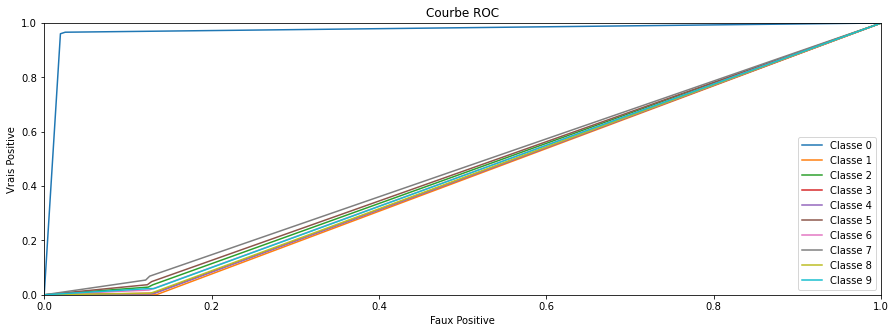

In [180]:
fpr10, tpr10, _ = roc_curve(Ytt, y_pred_RN, pos_label=10)
fpr1, tpr1, _ = roc_curve(Ytt, y_pred_RN, pos_label=1)
fpr2, tpr2, _ = roc_curve(Ytt, y_pred_RN, pos_label=2)
fpr3, tpr3, _ = roc_curve(Ytt, y_pred_RN, pos_label=3)
fpr4, tpr4, _ = roc_curve(Ytt, y_pred_RN, pos_label=4)
fpr5, tpr5, _ = roc_curve(Ytt, y_pred_RN, pos_label=5)
fpr6, tpr6, _ = roc_curve(Ytt, y_pred_RN, pos_label=6)
fpr7, tpr7, _ = roc_curve(Ytt, y_pred_RN, pos_label=7)
fpr8, tpr8, _ = roc_curve(Ytt, y_pred_RN, pos_label=8)
fpr9, tpr9, _ = roc_curve(Ytt, y_pred_RN, pos_label=9)

plt.figure(figsize=(15,5))
plt.plot(fpr10,tpr10,label="Classe 0")
plt.plot(fpr1,tpr1,label="Classe 1")
plt.plot(fpr2,tpr2,label="Classe 2")
plt.plot(fpr3,tpr3,label="Classe 3")
plt.plot(fpr4,tpr4,label="Classe 4")
plt.plot(fpr5,tpr5,label="Classe 5")
plt.plot(fpr6,tpr6,label="Classe 6")
plt.plot(fpr7,tpr7,label="Classe 7")
plt.plot(fpr8,tpr8,label="Classe 8")
plt.plot(fpr9,tpr9,label="Classe 9")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Faux Positive")
plt.ylabel("Vrais Positive")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

## Classe 0:

### Matrice de confusion:

In [181]:
class_0_RN = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 146		6
--------------------------------
NEGATIVE 24		1491
--------------------------------


### Rappel:

In [182]:
print(f"Le rappel: {rappel(class_0_RN[0],class_0_RN[1])}")

Le rappel: 0.9605263157894737


### Précision

In [183]:
print(f"La precision: {precision(class_0_RN[0],class_0_RN[2])}")

La precision: 0.8588235294117647


### Taux de FP

In [184]:
print(f"Le taux de faux positif: {taux_de_FP(class_0_RN[2],class_0_RN[1])}")

Le taux de faux positif: 0.8


### Spécificité

In [185]:
print(f" La spécificité : {specificite(class_0_RN[3],class_0_RN[2])}")

 La spécificité : 0.9841584158415841


## Classe 1:

### Matrice de confusion:

In [186]:
class_1_RN = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		164
--------------------------------
NEGATIVE 0		1503
--------------------------------


### Rappel:

In [187]:
print(f"Le rappel: {rappel(class_1_RN[0],class_1_RN[1])}")

Le rappel: 0.0


### Précision

In [188]:
print(f"La precision: {precision(class_1_RN[0],class_1_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [197]:
print(f"Le taux de faux positif: {taux_de_FP(class_1_RN[2],class_1_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_1_RN[3],class_1_RN[2])}")

## Classe 2:

### Matrice de confusion:

In [189]:
class_2_RN = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		163
--------------------------------
NEGATIVE 0		1504
--------------------------------


### Rappel:

In [198]:
print(f"Le rappel: {rappel(class_2_RN[0],class_2_RN[1])}")

Le rappel: 0.0


### Précision

In [199]:
print(f"La precision: {precision(class_2_RN[0],class_2_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [200]:
print(f"Le taux de faux positif: {taux_de_FP(class_2_RN[2],class_2_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_2_RN[3],class_2_RN[2])}")

## Classe 3:

### Matrice de confusion:

In [190]:
class_3_RN = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		170
--------------------------------
NEGATIVE 0		1497
--------------------------------


### Rappel:

In [201]:
print(f"Le rappel: {rappel(class_3_RN[0],class_3_RN[1])}")

Le rappel: 0.0


### Précision

In [202]:
print(f"La precision: {precision(class_3_RN[0],class_3_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [203]:
print(f"Le taux de faux positif: {taux_de_FP(class_3_RN[2],class_3_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_3_RN[3],class_3_RN[2])}")

## Classe 4:

### Matrice de confusion:

In [191]:
class_4_RN = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 156		1
--------------------------------
NEGATIVE 1331		179
--------------------------------


### Rappel:

In [204]:
print(f"Le rappel: {rappel(class_4_RN[0],class_4_RN[1])}")

Le rappel: 0.9936305732484076


### Précision

In [205]:
print(f"La precision: {precision(class_4_RN[0],class_4_RN[2])}")

La precision: 0.10490921318090114


### Taux de FP

In [206]:
print(f"Le taux de faux positif: {taux_de_FP(class_4_RN[2],class_4_RN[1])}")

Le taux de faux positif: 0.9992492492492493


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_4_RN[3],class_4_RN[2])}")

## Classe 5:

### Matrice de confusion:

In [192]:
class_5_RN = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		182
--------------------------------
NEGATIVE 0		1485
--------------------------------


### Rappel:

In [207]:
print(f"Le rappel: {rappel(class_5_RN[0],class_5_RN[1])}")

Le rappel: 0.0


### Précision

In [208]:
print(f"La precision: {precision(class_5_RN[0],class_5_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [209]:
print(f"Le taux de faux positif: {taux_de_FP(class_5_RN[2],class_5_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [210]:
print(f" La spécificité : {specificite(class_5_RN[3],class_5_RN[2])}")

 La spécificité : 1.0


## Classe 6:

### Matrice de confusion:

In [193]:
class_6_RN = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		162
--------------------------------
NEGATIVE 0		1505
--------------------------------


### Rappel:

In [211]:
print(f"Le rappel: {rappel(class_6_RN[0],class_6_RN[1])}")

Le rappel: 0.0


### Précision

In [212]:
print(f"La precision: {precision(class_6_RN[0],class_6_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [213]:
print(f"Le taux de faux positif: {taux_de_FP(class_6_RN[2],class_6_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_6_RN[3],class_6_RN[2])}")

## Classe 7:

### Matrice de confusion:

In [194]:
class_7_RN = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 3		166
--------------------------------
NEGATIVE 7		1491
--------------------------------


### Rappel:

In [214]:
print(f"Le rappel: {rappel(class_7_RN[0],class_7_RN[1])}")

Le rappel: 0.01775147928994083


### Précision

In [215]:
print(f"La precision: {precision(class_7_RN[0],class_7_RN[2])}")

La precision: 0.3


### Taux de FP

In [216]:
print(f"Le taux de faux positif: {taux_de_FP(class_7_RN[2],class_7_RN[1])}")

Le taux de faux positif: 0.04046242774566474


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_7_RN[3],class_7_RN[2])}")

## Classe 8:

### Matrice de confusion:

In [195]:
class_8_RN = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		186
--------------------------------
NEGATIVE 0		1481
--------------------------------


### Rappel:

In [217]:
print(f"Le rappel: {rappel(class_8_RN[0],class_8_RN[1])}")

Le rappel: 0.0


### Précision

In [218]:
print(f"La precision: {precision(class_8_RN[0],class_8_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [219]:
print(f"Le taux de faux positif: {taux_de_FP(class_8_RN[2],class_8_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_8_RN[3],class_8_RN[2])}")

## Classe 9:

### Matrice de confusion:

In [196]:
class_9_RN = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		162
--------------------------------
NEGATIVE 0		1505
--------------------------------


### Rappel:

In [220]:
print(f"Le rappel: {rappel(class_9_RN[0],class_9_RN[1])}")

Le rappel: 0.0


### Précision

In [ ]:
print(f"La precision: {precision(class_9_RN[0],class_9_RN[2])}")

### Taux de FP

In [221]:
print(f"Le taux de faux positif: {taux_de_FP(class_9_RN[2],class_9_RN[1])}")

Le taux de faux positif: 0.0


### Spécificité

In [ ]:
print(f" La spécificité : {specificite(class_9_RN[3],class_9_RN[2])}")